In [10]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
import os
import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
style = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# load ntuples

In [11]:
   
m = '55'
lumi = [ 35.9, 41.5, 59.7 ]
year='MC_Fall18'
masses = ['15','40','55','5']
m = '15'
analyzer = '74'
file = {}
tree = {}

# path = "/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/"+year+"/v2/v93/normalized/"
version = 'v114'
path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/'+version+'/normalized/'

path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/'



file['4Tau_m7'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-7.root'
file['4Tau_m15'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-15.root'
file['4Tau_m40'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-40.root'
file['4Tau_m55'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-55.root'


file['4Tau'] = path + 'ggH_HToSSTo4Tau_MH-125.root'

# path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/'

# file['ggH_HToSS_STodd_ms3p0_pl500'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_STodd_ms3p0_pl100'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGlueGlue_ms3p0_pl100'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGlueGlue_ms3p0_pl500'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl10'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl50'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl125'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl25'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl25_137000pb_weighted.root'

# file['ggH_HToSS_SToEE_ms0p4_pl10'] = path + 'ggH_HToSS_SToEE_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms0p4_pl50'] = path + 'ggH_HToSS_SToEE_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms1p0_pl125'] = path + 'ggH_HToSS_SToEE_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms1p0_pl25'] = path + 'ggH_HToSS_SToEE_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms2p0_pl250'] = path + 'ggH_HToSS_SToEE_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms2p0_pl50'] = path + 'ggH_HToSS_SToEE_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms4p0_pl100'] = path + 'ggH_HToSS_SToEE_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms4p0_pl500'] = path + 'ggH_HToSS_SToEE_ms4p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGammaGamma_ms0p4_pl10'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms0p4_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl125'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl25'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl250'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl100'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl500'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500_137000pb_weighted.root'

# file['HNL'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v73/normalized/HNL_testpoint1_137000pb_weighted.root'


for k, v in file.items():
    tree[k] = uproot.open(v)['MuonSystem']
    print(np.mean(tree[k].array('gLLP_ctau')))
    print(k,v)

180.24858
4Tau_m7 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125_MS-7.root
344.49353
4Tau_m15 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125_MS-15.root
870.68774
4Tau_m40 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125_MS-40.root
1388.1841
4Tau_m55 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125_MS-55.root
686.4573
4Tau /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125.root


# load branches

In [12]:
%%time
import uproot
import numpy as np
cut_based = True
cut_based_version='v4'
llp_r = {}
llp_z = {}
llp_e ={}
llp_pz = {}
llp_ez = {}
llp_p = {}
llp_gamma = {}
clusterR = {}
clusterZ = {}
clusterE = {}
clusterPz = {}
clusterEz = {}
clusterP = {}
clusterGamma = {}
clusterSize = {}
llp_emfracP = {}
llp_emfracPz = {}
llp_emfracE = {}
llp_emfracEz = {}
clusterEMFracP = {}
clusterEMFracPz = {}
clusterEMFracE = {}
clusterEMFracEz = {}
nCluster = {}

llp_EMP = {}
llp_EMPz = {}
llp_EME= {}
llp_EMEz= {}

llp_HadP= {}
llp_HadPz= {}
llp_HadE= {}
llp_HadEz= {}

clusterEMP= {}
clusterEMPz= {}
clusterEME= {}
clusterEMEz= {}

clusterHadP= {}
clusterHadPz= {}
clusterHadE= {}
clusterHadEz= {}
evtNum = {}
llp_visFracE= {}
cluster_visFracE={}
higgsPt_denom = {}
higgsPt_nom = {}
llp_ctau = {}
llp_multiplicity = {}
cluster_multiplicity = {}
weight_nom = {}
weight = {}
clusterme1112= {}
llp_eta = {}
cluster_llp_eta = {}
clusterEta = {}
re12 = {}
mb1 = {}
rb1 = {}
clusterZPos = {}

cscRechitClusterNStation10 = {}
cscRechitClusterEta = {}
cscRechitClusterAvgStation10 = {}
cut_based = {}

time= {}
timeSpread= {}
muonVeto= {}
jetVeto= {}
nCsc_cut = 50

for k, T in tree.items():
    sel_jet = np.logical_and(T.array('jetPt') > 50, np.abs(T.array('jetEta')) < 2.4 )
    ########### SELECTION: EVENTS ############

    
 
    sel_llp = np.abs(T.array('gLLP_eta'))<2.4
    sel_llp = np.logical_and(sel_llp, np.logical_and(T.array('gLLP_decay_vertex_r')< 695.5, np.abs(T.array('gLLP_decay_vertex_z')) < 1100))
    sel_llp = np.logical_and(sel_llp,  np.abs(T.array('gLLP_decay_vertex_z')) > 400)


    sel_ev = np.sum(sel_llp, axis=1)==1
    
    sel_llp = sel_llp[sel_ev]

    
    
    llp_r[k] = np.abs(T.array('gLLP_decay_vertex_r'))[sel_ev][sel_llp]
    llp_z[k] = np.abs(T.array('gLLP_decay_vertex_z'))[sel_ev][sel_llp]
    llp_ctau[k] = np.abs(T.array('gLLP_ctau'))[sel_ev][sel_llp]

    llp_eta[k] = np.abs(T.array('gLLP_eta'))[sel_ev][sel_llp]


    
    higgsPt_denom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]



    if not '4Tau' in k and not '4d' in k:
        llp_e[k] = T.array('gLLP_e')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_e')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp])/np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_pz[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_p[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
    else:
        llp_e[k] = T.array('gLLP_visE')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_visEz')[sel_ev][sel_llp])
        llp_p[k] = np.abs(T.array('gLLP_visP')[sel_ev][sel_llp])
        llp_pz[k] = np.abs(T.array('gLLP_visPz')[sel_ev][sel_llp]) 
        llp_visFracE[k] = T.array('gLLP_visE')[sel_ev][sel_llp]/T.array('gLLP_e')[sel_ev][sel_llp]
    if '4d' in k or 'v2' in k: llp_multiplicity[k] =  T.array('gLLP_multiplicity')[sel_ev][sel_llp]
    if '4b' in k:
        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:

        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        llp_EMP[k] = llp_p[k]
        llp_EMPz[k] = llp_pz[k]
        llp_EME[k] = llp_e[k]
        llp_EMEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_EMP[k]*1.0
        llp_emfracPz[k] = llp_EMP[k]*1.0
        llp_emfracE[k] = llp_EMP[k]*1.0
        llp_emfracEz[k] = llp_EMP[k]*1.0
    
        llp_HadP[k] = llp_EMP[k]*0.0
        llp_HadPz[k] = llp_EMP[k]*0.0
        llp_HadE[k] = llp_EMP[k]*0.0
        llp_HadEz[k] = llp_EMP[k]*0.0
    
    else:
        llp_emfracP[k] = T.array('gLLP_EMFracP')[sel_ev][sel_llp]
        llp_emfracPz[k] = T.array('gLLP_EMFracPz')[sel_ev][sel_llp]
        llp_emfracE[k] = T.array('gLLP_EMFracE')[sel_ev][sel_llp]
        llp_emfracEz[k] = T.array('gLLP_EMFracEz')[sel_ev][sel_llp]
    
        llp_EMP[k] = llp_emfracP[k]*llp_p[k]
        llp_EMPz[k] = llp_emfracPz[k]*llp_pz[k]
        llp_EME[k] = llp_emfracE[k]*llp_e[k]
        llp_EMEz[k] = llp_emfracEz[k]*llp_ez[k]

        llp_HadP[k] = llp_p[k]-llp_EMP[k]
        llp_HadPz[k] = llp_pz[k]-llp_EMPz[k]
        llp_HadE[k] = llp_e[k]-llp_EME[k]
        llp_HadEz[k] = llp_ez[k]-llp_EMEz[k]

    evtNum[k] = T.array('evtNum')[sel_ev]
    weight[k] = T.array('weight')[sel_ev]
    cluster_index = '3'

    ########### SELECTION: CLUSTERS ############

    sel_rechitcluster = np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_eta'))< 2.4

    sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_r')) < 695.5, \
                                                                         np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z')) < 1100))
    sel_rechitcluster = np.logical_and(sel_rechitcluster,np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z'))> 400)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster'+cluster_index+'Size')>=nCsc_cut)


    nCluster[k] = sel_rechitcluster.sum()[sel_ev]
    sel_ev = np.logical_and(sel_ev,sel_rechitcluster.sum()==1)
    higgsPt_nom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]
    weight_nom[k] = T.array('weight')[sel_ev]


    clusterR[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_r'))[sel_rechitcluster][sel_ev].flatten()
    clusterZ[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_z'))[sel_rechitcluster][sel_ev].flatten()
    clusterZPos[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Z'))[sel_rechitcluster][sel_ev].flatten()


    cluster_llp_eta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta'))[sel_rechitcluster][sel_ev].flatten()
    clusterEta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta'))[sel_rechitcluster][sel_ev].flatten()



    clusterSize[k] = T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev].flatten()


    
    clusterme1112[k] =  (T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus11')+\
         T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus12') +\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus11')+\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus12'))[sel_rechitcluster][sel_ev].flatten()
    
    re12[k] = T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4')[sel_rechitcluster][sel_ev].flatten()
    mb1[k] = T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4')[sel_rechitcluster][sel_ev].flatten()
    rb1[k] =  T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4')[sel_rechitcluster][sel_ev].flatten()
    time[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_rechitcluster][sel_ev].flatten()
    timeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpread')[sel_rechitcluster][sel_ev].flatten()
    muonVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_rechitcluster][sel_ev].flatten()
    jetVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev].flatten()
    if not '4Tau' in k and not '4d' in k:

        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten())\
                              /np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))

    else:#only for 4tau
        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visE')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visPz')[sel_rechitcluster][sel_ev].flatten())
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visP')[sel_rechitcluster][sel_ev].flatten())
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visEz')[sel_rechitcluster][sel_ev].flatten())
   

        cluster_visFracE[k] = clusterE[k]/T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()

    if '4d' in k or 'v2' in k: cluster_multiplicity[k] =  np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_multiplicity')[sel_rechitcluster][sel_ev].flatten())


    if '4b' in k:

        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        clusterEMFracP[k] = clusterP[k]*1.0
        clusterEMFracPz[k] = clusterP[k]*1.0
        clusterEMFracE[k] = clusterP[k]*1.0
        clusterEMFracEz[k] = clusterP[k]*1.0

        clusterEMP[k] = clusterP[k]
        clusterEMPz[k] = clusterPz[k]
        clusterEME[k] = clusterE[k]
        clusterEMEz[k] = clusterEz[k]

        clusterHadP[k] = clusterP[k]*0.0
        clusterHadPz[k] = clusterPz[k]*0.0
        clusterHadE[k] = clusterE[k]*0.0
        clusterHadEz[k] = clusterEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:
        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    else:
        clusterEMFracP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracP'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracPz'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracE[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracE'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracEz'))[sel_rechitcluster][sel_ev].flatten()


        clusterEMP[k] = clusterEMFracP[k]*clusterP[k]
        clusterEMPz[k] = clusterEMFracPz[k]*clusterPz[k]
        clusterEME[k] = clusterEMFracE[k]*clusterE[k]
        clusterEMEz[k] = clusterEMFracEz[k]*clusterEz[k]

        clusterHadP[k] = clusterP[k]-clusterEMP[k]
        clusterHadPz[k] = clusterPz[k]-clusterEMPz[k]
        clusterHadE[k] = clusterE[k]-clusterEME[k]
        clusterHadEz[k] = clusterEz[k]-clusterEMEz[k]
    print(k)
        
    cscRechitClusterNStation10[k] = T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_rechitcluster][sel_ev].flatten()
    
    cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
    cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
    cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    

4Tau_m7
4Tau_m15
4Tau_m40
4Tau_m55
4Tau
CPU times: user 1min 28s, sys: 3.93 s, total: 1min 32s
Wall time: 2min 3s


# implement cut-based ID (testing for cut_based_id.py uploaded to HEPData entry)

### a copy of the cut_based_id.py

In [13]:
# given array of LLP decay position Z, R in cm, output the avgStation prediction
# prediction is 92% accurate
def ZToStation(Z, R): 
    station = np.copy(Z)
    station[np.abs(Z)<632] = 1
    station[np.logical_and(np.abs(Z)<724, np.abs(R)>275)] = 1
    station[np.logical_and(station>1, np.abs(Z)<850)] = 2
    station[np.logical_and(np.abs(Z)>=850,np.abs(Z)<970)] = 3
    station[np.abs(Z)>=970] = 4
    return station

#input: list of LLP decay position in Z, R, LLP hadronic energy, LLP eta, and a histogram of parametrization of NStation>1 efficiency wrt to LLP hadronic energy
#input type: z, r, hadE, eta are numpy arrays and eff_hist is TH1F
#output: list of probability that the event passes cut-based ID
def cut_based_id(z, r, hadE, eta, eff_hist):
    avgStation = ZToStation(z, r)
    eta_cut = np.copy(avgStation)
    eta_cut[eta_cut==1]  = 1.8 #implicitly 1.1
    eta_cut[eta_cut==2]  = 1.6
    eta_cut[eta_cut==3]  = 1.6
    eta_cut[eta_cut==4]  = 1.8
    weight=[]
    for j in range(len(hadE)):  
        if hadE[j]>250: x= eff_hist.GetNbinsX()
        else: x = eff_hist.GetXaxis().FindFixBin(np.abs(hadE)[j])
        weight.append(eff_hist.GetBinContent(x))
        if eff_hist.GetBinContent(x)>1:print(x, hadE[j])
    weight = np.array(weight)

    #apply eta<1.9 if NStation>1, else apply different eta cut as defined above
    weight = weight*(np.abs(eta)<1.9)+(1-weight)*(np.abs(eta)<eta_cut)  
    return weight


#use uproot

def cut_based_id_uproot(z, r, hadE, eta, eff_hist):
    avgStation = ZToStation(z, r)
    eta_cut = np.copy(avgStation)
    eta_cut[eta_cut==1]  = 1.8 #implicitly 1.1
    eta_cut[eta_cut==2]  = 1.6
    eta_cut[eta_cut==3]  = 1.6
    eta_cut[eta_cut==4]  = 1.8
    weight = eff_hist.values[np.argmax(eff_hist.edges>hadE[:,None],axis=1)-1]
    weight[hadE==0] = eff_hist.values[0]

    #apply eta<1.9 if NStation>1, else apply different eta cut as defined above
    weight = weight*(np.abs(eta)<1.9)+(1-weight)*(np.abs(eta)<eta_cut)  
    return weight






### check accuracy of signal yield prediction using parameterization vs full-sim preduction (Table 55 in AN-19-154)

In [21]:
# two ways used to load NStation>1 efficiency
# uproot is much faster, used to calculate signal yield prediction
# ROOT version is provided in cut_based_id.py in HEPData entry, but too slow to run, made sure two methods gave the same result

wt = {}
for m in tree.keys():wt[m] = []
region = 'b' # only check for region B
    
# load eff_hist
cut = 130
# source_file = rt.TFile.Open('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cutbasedID_eff_'+str(cut)+'.root', 'READ')
# eff_hist = source_file.Get('h_'+m+'_'+region)
source_file1 = uproot.open('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cutbasedID_eff_'+str(cut)+'.root')
eff_hist_uproot = source_file1['h_'+m+'_'+region]

for m in tree.keys():
#     if not m == 'ggH_HToSS_SToEE_ms0p4_pl10':continue
    condb = np.abs(clusterZ[m])>671
    condb = np.logical_and(condb, np.abs(cluster_llp_eta[m])<2)
    condb = np.logical_and(condb,np.abs(clusterEta[m])<2)
    condb= np.logical_and(condb, clusterme1112[m]==0)
    condb= np.logical_and(condb, re12[m]==0)
    condb= np.logical_and(condb, rb1[m]==0)
    condb= np.logical_and(condb, mb1[m]==0)
    condb= np.logical_and(condb, timeSpread[m]<20)
    condb= np.logical_and(condb, muonVeto[m]<20)
    condb= np.logical_and(condb, clusterSize[m]>=cut)


    w_uproot = cut_based_id_uproot(clusterZ[m][condb], clusterR[m][condb],clusterHadE[m][condb], cluster_llp_eta[m][condb], eff_hist_uproot)
#         w = cut_based_id(clusterZ[m][condb], clusterR[m][condb],clusterHadE[m][condb], cluster_llp_eta[m][condb], eff_hist)
    wt[m] = list(w_uproot)

    if len(wt[m])==0:continue
        
    # calculate uncertainty of cut-based ID Efficiency
    n1 = np.sum(wt[m]) # parameterized signal yield
    n2 = np.count_nonzero(cut_based[m][condb]) # full-sim signal yield
    if n2 == 0:continue
    ratio = 1.0*n1/n2
    err = (1/n1+1.0/n2)**0.5*n1/n2

    print(m, '\t', round(ratio,3), '$\pm$', round(err,3))


4Tau_m7 	 0.962 $\pm$ 0.006
4Tau_m15 	 0.958 $\pm$ 0.006
4Tau_m40 	 0.961 $\pm$ 0.006
4Tau_m55 	 0.973 $\pm$ 0.007
4Tau 	 0.963 $\pm$ 0.003


## Check accuracy of avgStation function

4d_m55


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


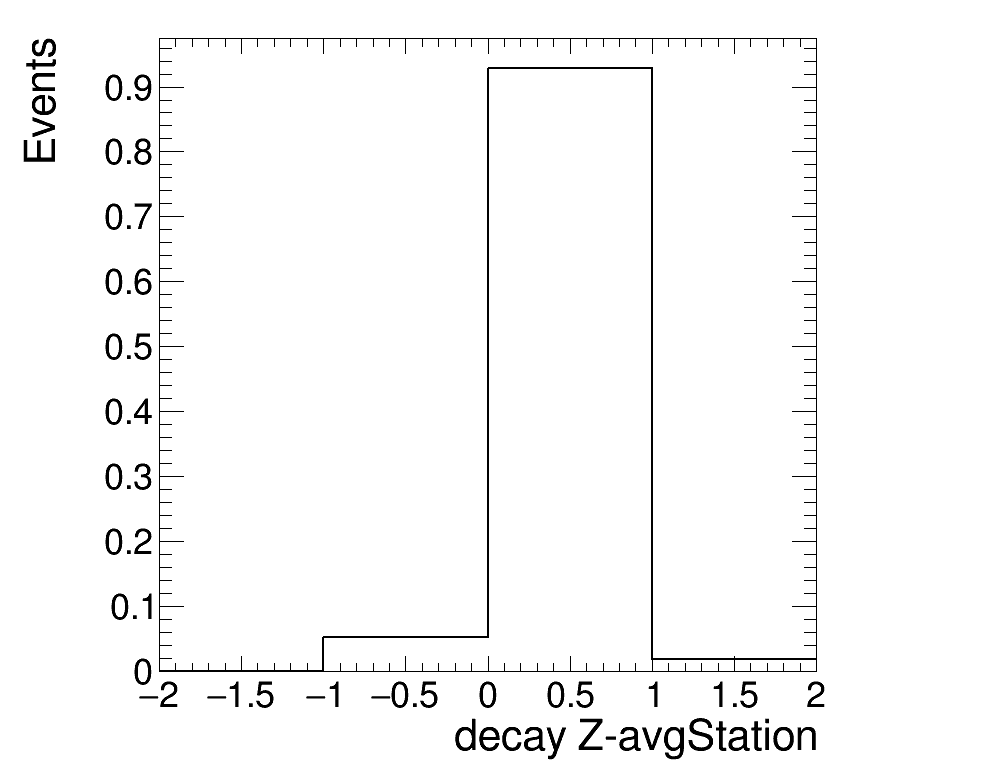

In [145]:
leg = rt.TLegend(0.65,0.73,0.85,0.85)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 1000, 800)
rt.gStyle.SetOptFit(1011)
h = {}

for i, m in enumerate(llp_r.keys()):
    if not '4d_m55' in m:continue
    bins_temp = bins[index[0]]+bins[index[1]]+[len(bins[index[0]])]+[len(bins[index[1]])]
    cond = cscRechitClusterNStation10[m]==1
    cond = np.logical_and(cond, np.abs(cluster_llp_eta[m])<2)
    cond = np.logical_and(cond,np.abs(clusterEta[m])<2)
    cond= np.logical_and(cond, clusterme1112[m]==0)
    cond= np.logical_and(cond, re12[m]==0)
    cond= np.logical_and(cond, rb1[m]==0)
    cond= np.logical_and(cond, mb1[m]==0)
    
    
    proxy_z = np.abs(clusterZ[m][cond])
    proxy_z[np.abs(clusterZ[m][cond])<632] = 1
    proxy_z[np.logical_and(np.abs(clusterZ[m][cond])<724, np.abs(clusterR[m][cond])>275)] = 1
    proxy_z[np.logical_and(proxy_z>1, np.abs(clusterZ[m][cond])<850)] = 2
    proxy_z[np.logical_and(np.abs(clusterZ[m][cond])>=850,np.abs(clusterZ[m][cond])<970)] = 3
    proxy_z[np.abs(clusterZ[m][cond])>=970] = 4



#     h[m] = create_TH2D(np.column_stack((np.abs(clusterZ[m][cond]),np.abs(cscRechitClusterAvgStation10[m][cond]))), axis_title=['decay Z', 'avgStation', 'Events'], binning = [50,300,1100,5,0,5])
#     h[m] = create_TH2D(np.column_stack((proxy_z,np.abs(cscRechitClusterAvgStation10[m][cond]))), axis_title=['decay Z', 'avgStation', 'Events'], binning = [5,0,5,5,0,5])


    h[m] = create_TH1D(proxy_z-np.abs(cscRechitClusterAvgStation10[m][cond]), axis_title=['decay Z-avgStation', 'Events'], binning = [4,-2,2])
    



    h[m].SetLineColor(std_color_list[j])
    h[m].DrawNormalized('' if i == 0 else 'same')



# leg.Draw()
c.SetRightMargin(0.18)
c.SetLogz()
c.Draw()
